# SVM
----------------------------

[UCI_machine learning repository](https://archive.ics.uci.edu/ml/index.php)

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [70]:
## sklearn에 내장되어 있는 데이터 불러오기
from sklearn import datasets

data = datasets.load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [71]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [72]:
data['feature_names'], len(data['feature_names'])

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 30)

In [73]:
## 데이터 프레임으로 바꾸기
df_x = pd.DataFrame(data.data, columns = data.feature_names)

In [74]:
df_x.shape

(569, 30)

In [75]:
df_y = pd.DataFrame(data.target, columns = ['target'])

In [76]:
df_y.shape

(569, 1)

In [77]:
##결측치 확인
df_x.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [78]:
## 중복치 확인
df_x[df_x.duplicated()].sum()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64

In [79]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [80]:
df_y.value_counts()

target
1         357
0         212
dtype: int64

## 학습/테스트 데이터 분리

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 2022, shuffle = True, stratify = df_y)

In [82]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [23]:
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
193,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,...,15.65,39.34,101.70,768.9,0.17850,0.4706,0.4425,0.14590,0.3215,0.12050
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.2698,0.4023,0.14240,0.2964,0.09606
344,11.710,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.06,18.16,84.16,516.4,0.14600,0.1115,0.1087,0.07864,0.2765,0.07806
536,14.270,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,0.05982,...,15.29,34.27,104.30,728.3,0.13800,0.2733,0.4234,0.13620,0.2698,0.08351


In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
y_train = y_train.values.reshape(-1)

## 학습

In [22]:
## linear svm

In [85]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_scaled, y_train)

SVC(kernel='linear')

In [86]:
## 테스트

In [87]:
x_test_scaled = ss.transform(x_test)
y_test = y_test.values.reshape(-1)

In [88]:
y_pred = clf.predict(x_test_scaled)

In [89]:
## 정확도

In [90]:
(y_test == y_pred).sum()/y_test.shape[0]

0.9912280701754386

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9912280701754386

In [92]:
## confusion matrix

In [93]:
from sklearn.metrics import confusion_matrix

#앞에 정답값을 넣어야함
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[41,  1],
       [ 0, 72]], dtype=int64)

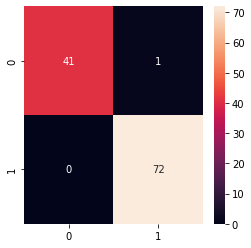

In [94]:
plt.figure(figsize = (4,4))
sns.heatmap(cfm, annot = True)
plt.show()

In [95]:
## RBF

In [96]:
clf = svm.SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')
clf.fit(x_train_scaled, y_train)

SVC()

In [97]:
y_pred = clf.predict(x_test_scaled)

In [98]:
accuracy_score(y_test, y_pred)

0.9912280701754386

## 하이퍼 파라미터 튜닝 (GridSearch)

In [99]:
from sklearn.model_selection import GridSearchCV

## parameter의 값들의 간격을 크게 설정하여 돌린 후 잘 나온 곳을 좀 더 세세하게 나누어 또 돌려보며 최대한 좋은 값들을 얻어낸다.

param = {
    'C' : range(1, 100),
    'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
    'kernel' : ['rbf']
}

model = svm.SVC()
grid = GridSearchCV(model, param, refit = True)
grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100),
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100],
                         'kernel': ['rbf']})

In [100]:
grid.best_params_

{'C': 3, 'gamma': 0.05, 'kernel': 'rbf'}

In [105]:
grid.best_score_

0.9780219780219781

In [101]:
best_clf = grid.best_estimator_

In [102]:
y_pred = grid.best_estimator_.predict(x_test_scaled)

In [103]:
accuracy_score(y_test, y_pred)

0.9824561403508771

In [ ]:
## RandomizedSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param = {
    'C' : uniform(),
    'gamma' : uniform(),
    'kernel' : ['rbf']
}

model = svm.SVC()
rb = RandomizedSearchCV(model, param, refit = True)
rb.fit(x_train_scaled, y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000125A7980220>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000125A67D1130>,
                                        'kernel': ['rbf']})

In [109]:
rb.best_params_

{'C': 0.9309714838535645, 'gamma': 0.09646509451209806, 'kernel': 'rbf'}

In [111]:
rb.best_score_

0.956043956043956

In [112]:
best_rb_clf = rb.best_estimator_

In [113]:
y_pred = rb.best_estimator_.predict(x_test_scaled)

In [114]:
accuracy_score(y_test, y_pred)

0.9649122807017544